## unlike oversample EDA for this EDA we will explore the different tier insights

In [1]:
# Basic Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re

In [2]:
##natural language processing
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [3]:
##for machine learning
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [4]:
#importing
under_dataframe= pd.read_csv('undersample.csv')

In [5]:
#Average length of each row 172.2460606060606
under_dataframe.comments_nostop.str.len().mean()

172.60060606060605

In [6]:
#Unique Word count 140
_over_count = pd.Series(' '.join(under_dataframe['comments_nostop'] ).split()).value_counts()
_over_count.nunique() 

138

In [7]:
under_dataframe.head

<bound method NDFrame.head of       Unnamed: 0  Unnamed: 0.1  listing_id            id        date  \
0            181           200    294281.0  1.061740e+07   28/2/2014   
1            184           203    294281.0  1.701706e+07    5/8/2014   
2            244           271    294281.0  5.602003e+08   6/11/2019   
3            434           479    369145.0  4.995826e+06    6/6/2013   
4            457           503    369145.0  1.163950e+07   10/4/2014   
...          ...           ...         ...           ...         ...   
1645        5126          5750   5040689.0  1.879640e+08   28/8/2017   
1646       20311         23677  16988242.0  1.468517e+08   23/4/2017   
1647       37333         43220  53174972.0  5.220000e+17  21/12/2021   
1648       31565         36582  33112080.0  5.305935e+08   16/9/2019   
1649       23618         27412  21416331.0  2.504162e+08    5/4/2018   

      reviewer_id reviewer_name  \
0       1370876.0       Deborah   
1      18295170.0           Zhi   


In [8]:
##tier
under_dataframe_N = under_dataframe[(under_dataframe['bin_word'] == "N")]
under_dataframe_QN = under_dataframe[(under_dataframe['bin_word'] == "QN")]
under_dataframe_VN = under_dataframe[(under_dataframe['bin_word'] == "VN")]

In [9]:
under_dataframe_P = under_dataframe[(under_dataframe['bin_word'] == "P")]
under_dataframe_QP = under_dataframe[(under_dataframe['bin_word'] == "QP")]      
under_dataframe_VP = under_dataframe[(under_dataframe['bin_word'] == "VP")]                      

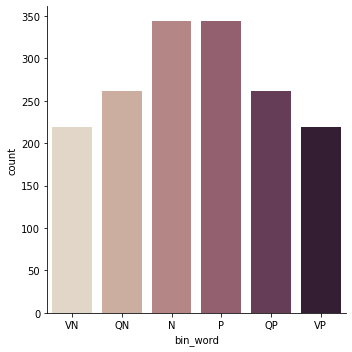

In [10]:
##boxplot for cat
sns.catplot(x="bin_word", kind="count", palette="ch:.25", data=under_dataframe)

## N wordcount

In [11]:
under_dataframe_N_count = pd.Series(' '.join(under_dataframe_N['comments'] ).split()).value_counts()
under_dataframe_N_count.head

<bound method NDFrame.head of THE          944
AND          494
TO           413
IS           392
A            373
            ... 
EXPECTING      1
LIKELY         1
ADULT          1
FUN            1
VISITORS       1
Length: 2489, dtype: int64>

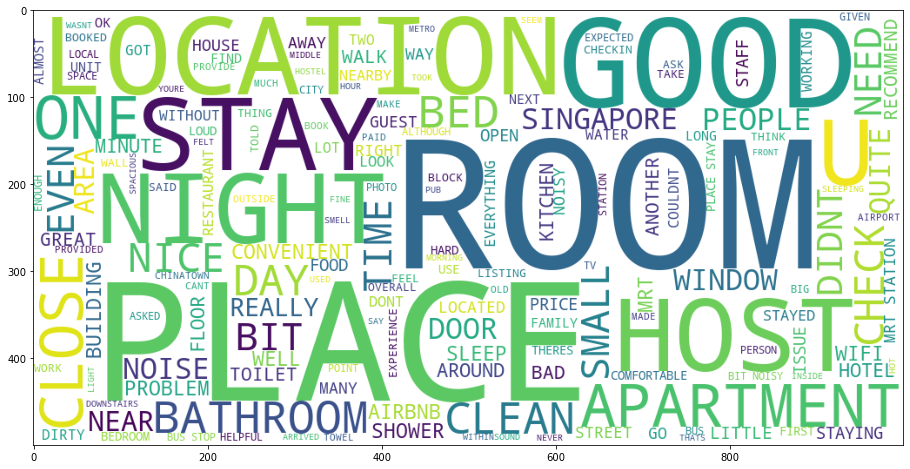

In [12]:
#word cloud
corpus = under_dataframe_N['comments_nostop']
plt.rcParams['figure.figsize'] = 20,8
word_cloud = ""
for row in corpus:
    for word in row:
        word_cloud+=" ".join(word)
wordcloud1 = WordCloud(width = 1000, height = 500,background_color ='white',min_font_size = 10).generate(word_cloud)

#word cloud
plt.imshow(wordcloud1)

In [13]:
##ngram exploration
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

<AxesSubplot:>

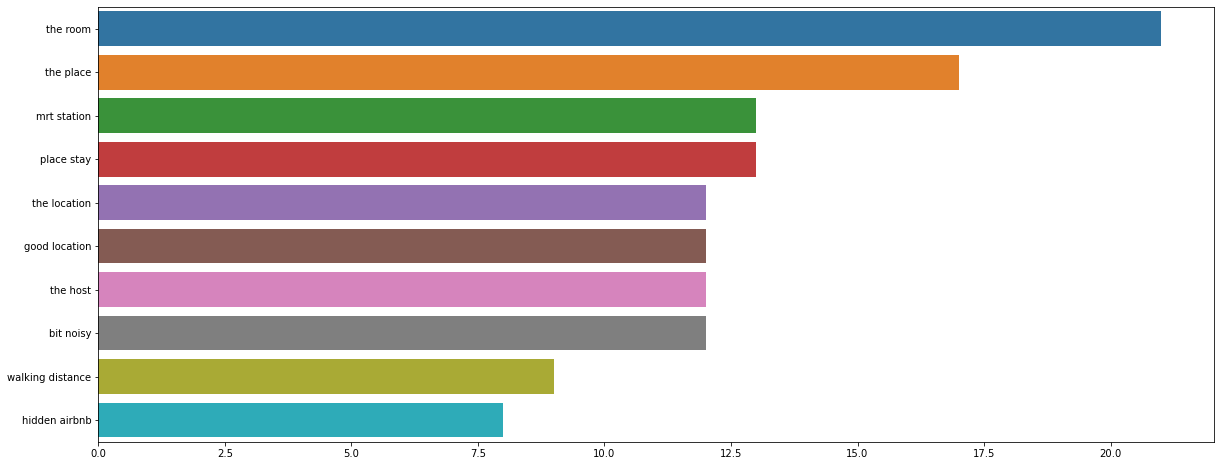

In [14]:
N_twograms=get_top_ngram(under_dataframe_N['comments_nostop'],n=2)
x,y=map(list,zip(*N_twograms))
sns.barplot(x=y,y=x)

<AxesSubplot:>

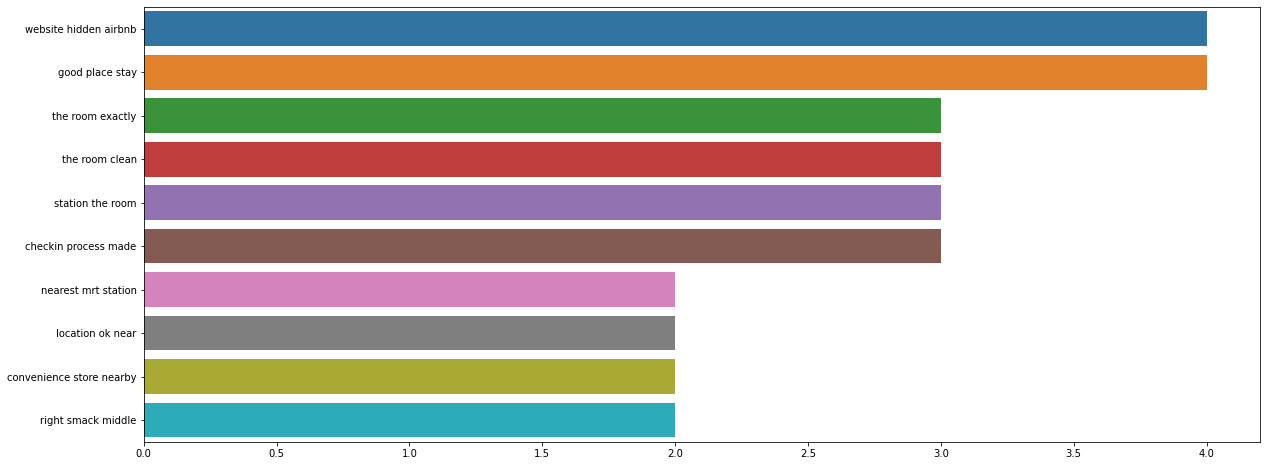

In [15]:
N_threegrams=get_top_ngram(under_dataframe_N['comments_nostop'],n=3)
x,y=map(list,zip(*N_threegrams))
sns.barplot(x=y,y=x)

<AxesSubplot:>

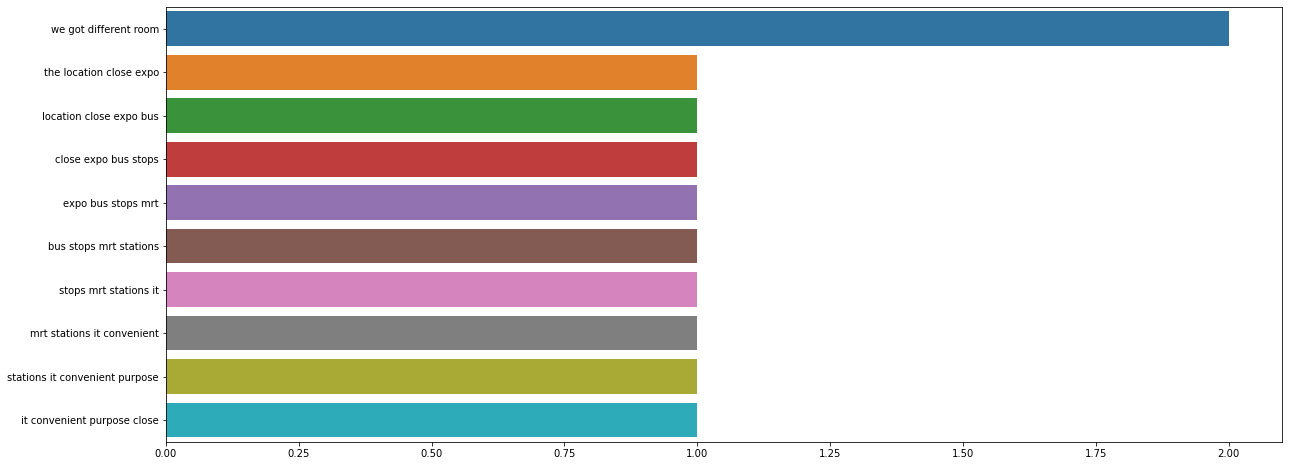

In [16]:
N_fourgrams=get_top_ngram(under_dataframe_N['comments_nostop'],n=4)
x,y=map(list,zip(*N_fourgrams))
sns.barplot(x=y,y=x)

## QN

In [17]:
under_dataframe_QN_count = pd.Series(' '.join(under_dataframe_QN['comments'] ).split()).value_counts()
under_dataframe_QN_count.head

<bound method NDFrame.head of THE           812
TO            421
AND           353
IS            291
WAS           249
             ... 
EXPENSIVE,      1
IT,             1
DESIRED         1
LEAVES          1
FM              1
Length: 2211, dtype: int64>

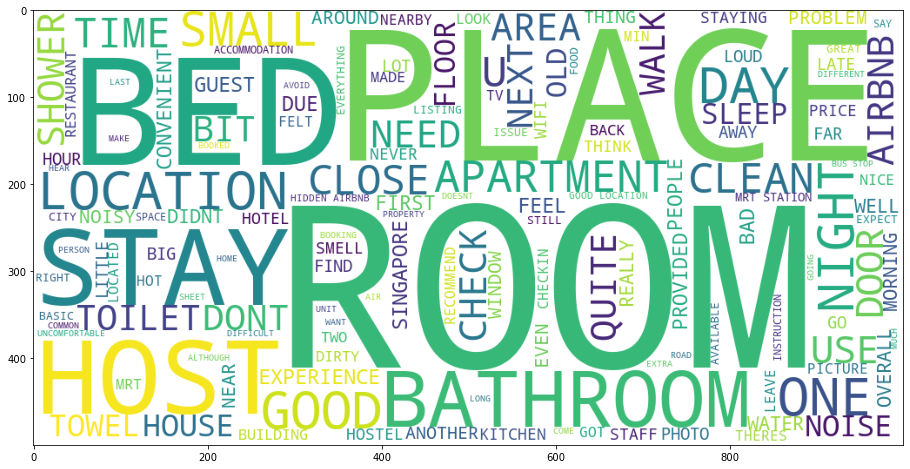

In [18]:
#word cloud
corpus = under_dataframe_QN['comments_nostop']
plt.rcParams['figure.figsize'] = 20,8
word_cloud = ""
for row in corpus:
    for word in row:
        word_cloud+=" ".join(word)
wordcloud2 = WordCloud(width = 1000, height = 500,background_color ='white',min_font_size = 10).generate(word_cloud)

#word cloud
plt.imshow(wordcloud2)

<AxesSubplot:>

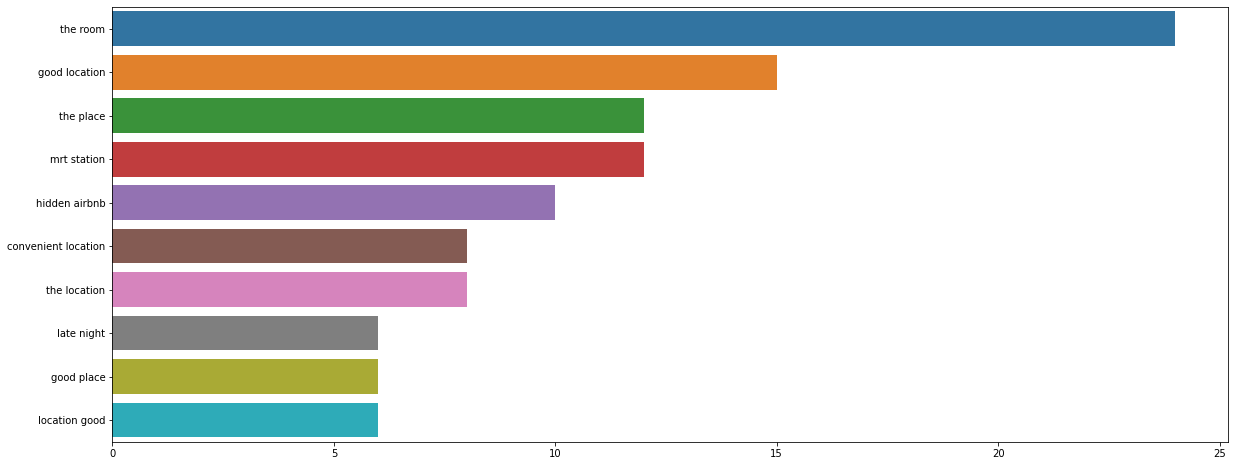

In [19]:
QN_twograms=get_top_ngram(under_dataframe_QN['comments_nostop'],n=2)
x,y=map(list,zip(*QN_twograms))
sns.barplot(x=y,y=x)

<AxesSubplot:>

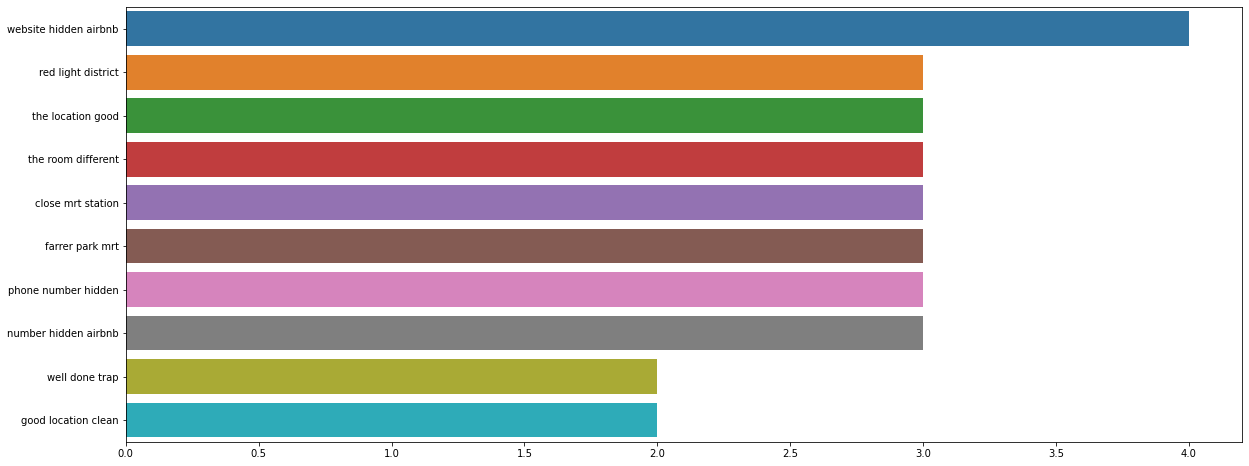

In [20]:
QN_threegrams=get_top_ngram(under_dataframe_QN['comments_nostop'],n=3)
x,y=map(list,zip(*QN_threegrams))
sns.barplot(x=y,y=x)

<AxesSubplot:>

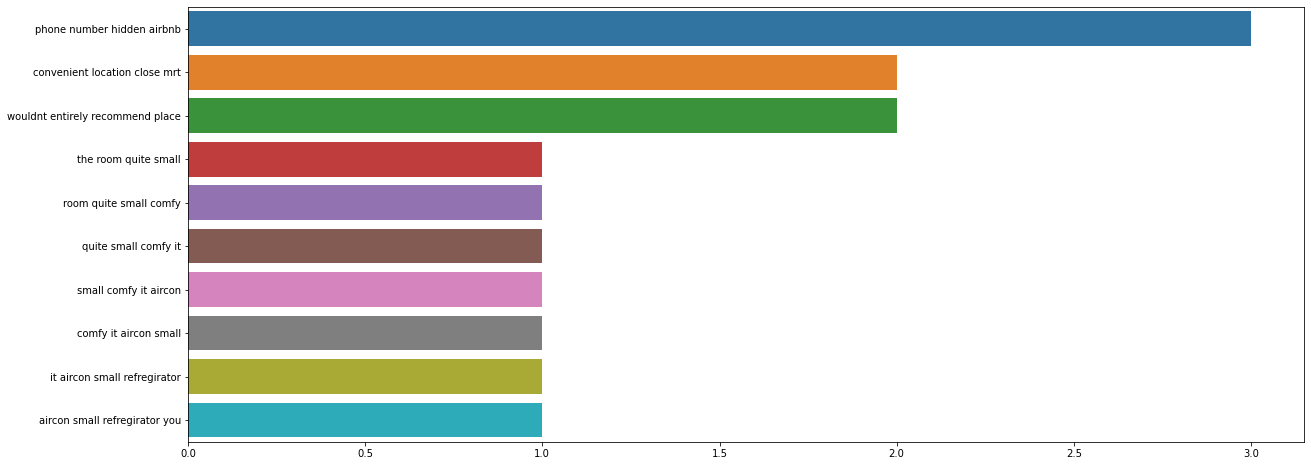

In [21]:
QN_fourgrams=get_top_ngram(under_dataframe_QN['comments_nostop'],n=4)
x,y=map(list,zip(*QN_fourgrams))
sns.barplot(x=y,y=x)

## VN

In [22]:
under_dataframe_VN_count = pd.Series(' '.join(under_dataframe_VN['comments'] ).split()).value_counts()
under_dataframe_VN_count.head

<bound method NDFrame.head of THE            1631
AND             777
TO              734
I               515
A               481
               ... 
WALKABLE          1
CONDITIONED       1
PLANE             1
CATCHING          1
UNFIT             1
Length: 3436, dtype: int64>

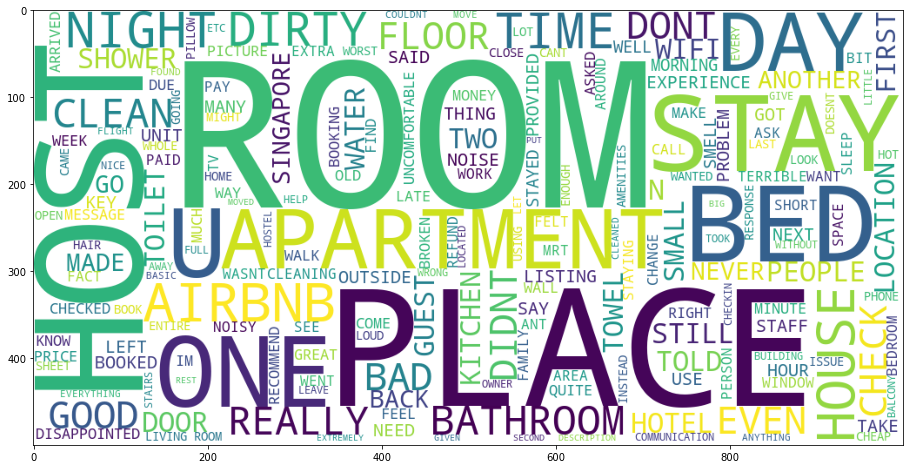

In [23]:
#word cloud
corpus = under_dataframe_VN['comments_nostop']
plt.rcParams['figure.figsize'] = 20,8
word_cloud = ""
for row in corpus:
    for word in row:
        word_cloud+=" ".join(word)
wordcloud3 = WordCloud(width = 1000, height = 500,background_color ='white',min_font_size = 10).generate(word_cloud)

#word cloud
plt.imshow(wordcloud3)

<AxesSubplot:>

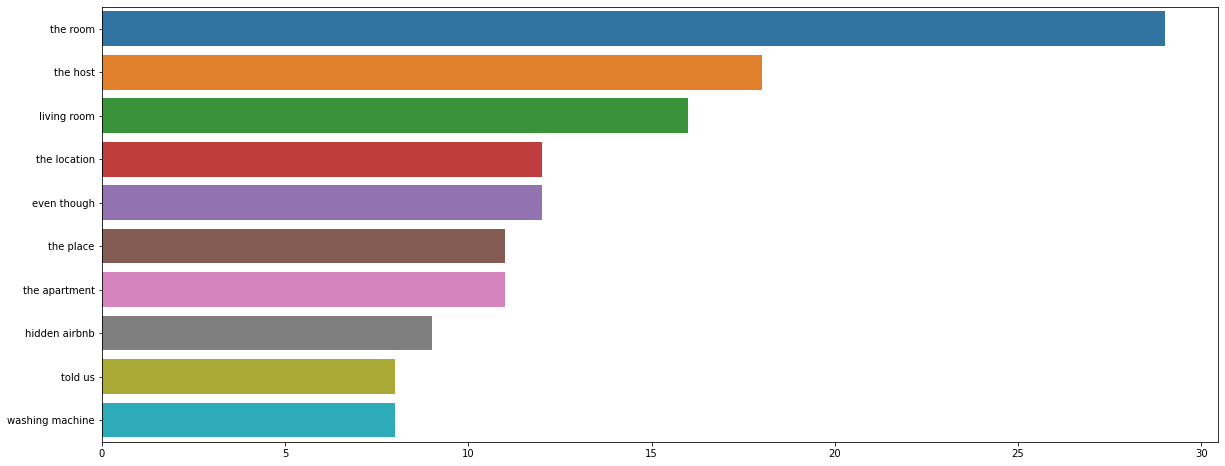

In [24]:
VN_twograms=get_top_ngram(under_dataframe_VN['comments_nostop'],n=2)
x,y=map(list,zip(*VN_twograms))
sns.barplot(x=y,y=x)

<AxesSubplot:>

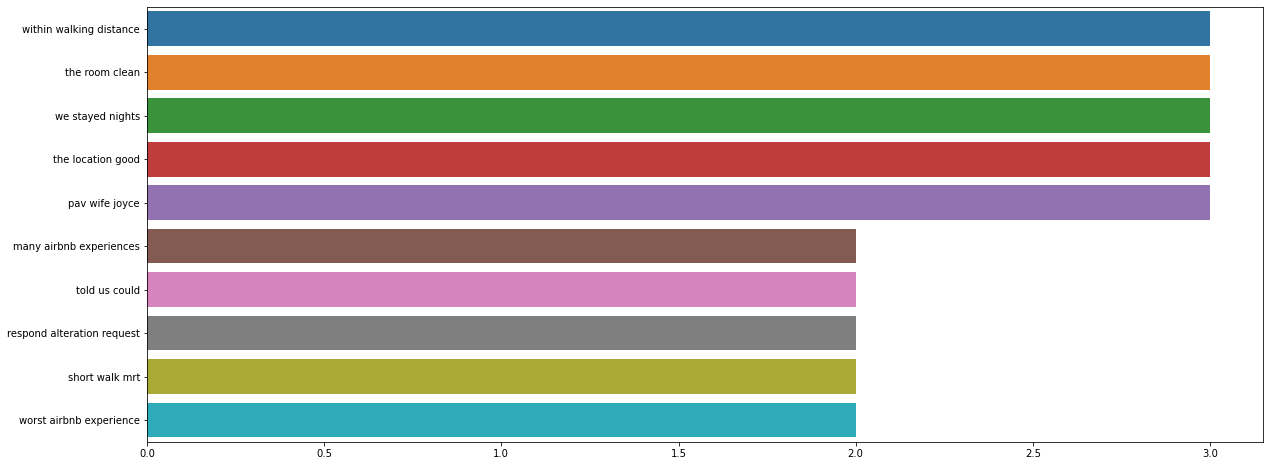

In [25]:
VN_threegrams=get_top_ngram(under_dataframe_VN['comments_nostop'],n=3)
x,y=map(list,zip(*VN_threegrams))
sns.barplot(x=y,y=x)

<AxesSubplot:>

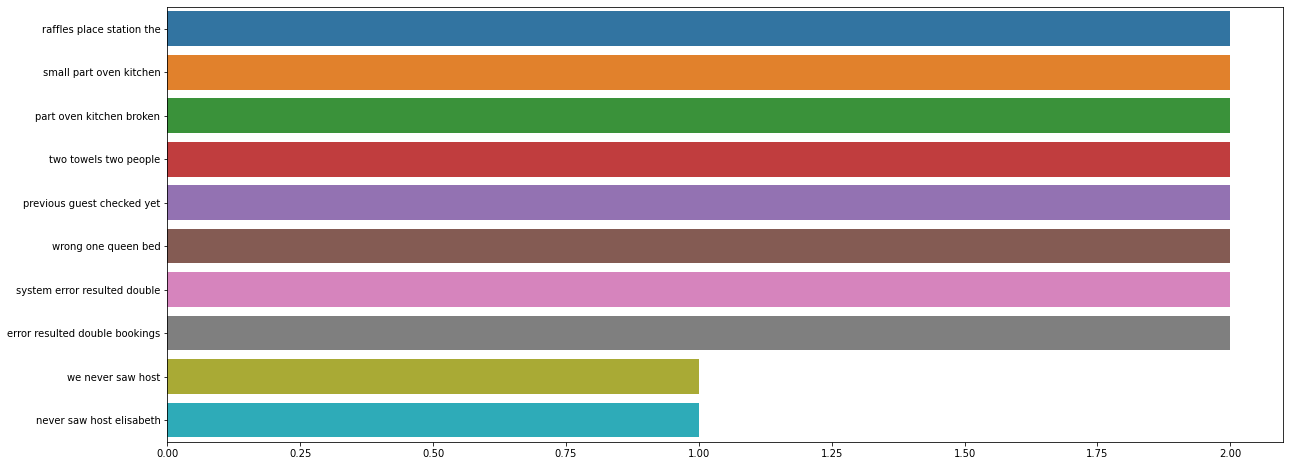

In [26]:
VN_fourgrams=get_top_ngram(under_dataframe_VN['comments_nostop'],n=4)
x,y=map(list,zip(*VN_fourgrams))
sns.barplot(x=y,y=x)

## positive 

In [27]:
under_dataframe_P_count = pd.Series(' '.join(under_dataframe_P['comments'] ).split()).value_counts()
under_dataframe_P_count.head

<bound method NDFrame.head of THE         496
TO          280
AND         261
IS          236
A           211
           ... 
PARTY         1
SMASHING      1
BEER          1
BAR           1
SOLID         1
Length: 1746, dtype: int64>

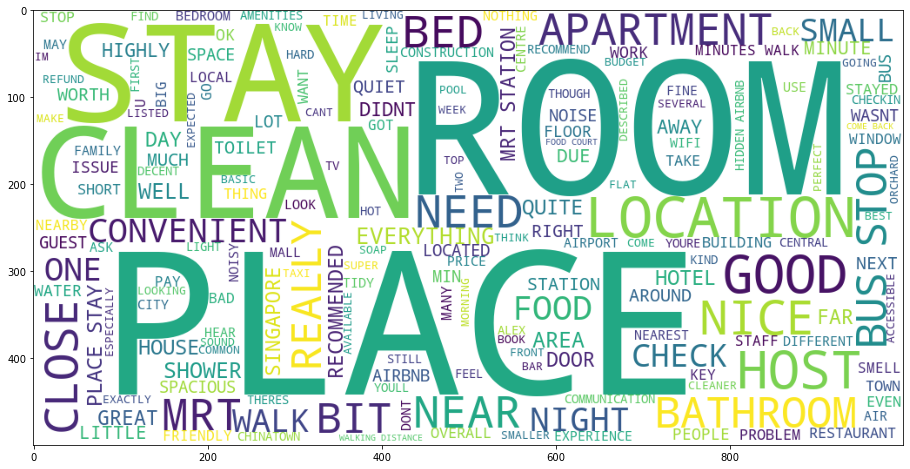

In [28]:
#word cloud
corpus = under_dataframe_P['comments_nostop']
plt.rcParams['figure.figsize'] = 20,8
word_cloud = ""
for row in corpus:
    for word in row:
        word_cloud+=" ".join(word)
wordcloud4 = WordCloud(width = 1000, height = 500,background_color ='white',min_font_size = 10).generate(word_cloud)

#word cloud
plt.imshow(wordcloud4)

<AxesSubplot:>

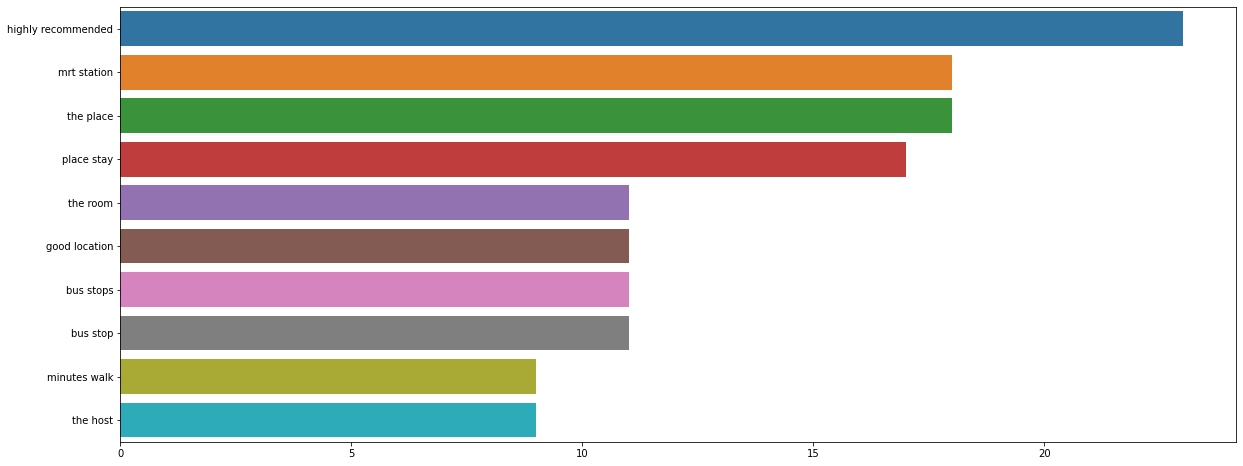

In [29]:
P_twograms=get_top_ngram(under_dataframe_P['comments_nostop'],n=2)
x,y=map(list,zip(*P_twograms))
sns.barplot(x=y,y=x)

<AxesSubplot:>

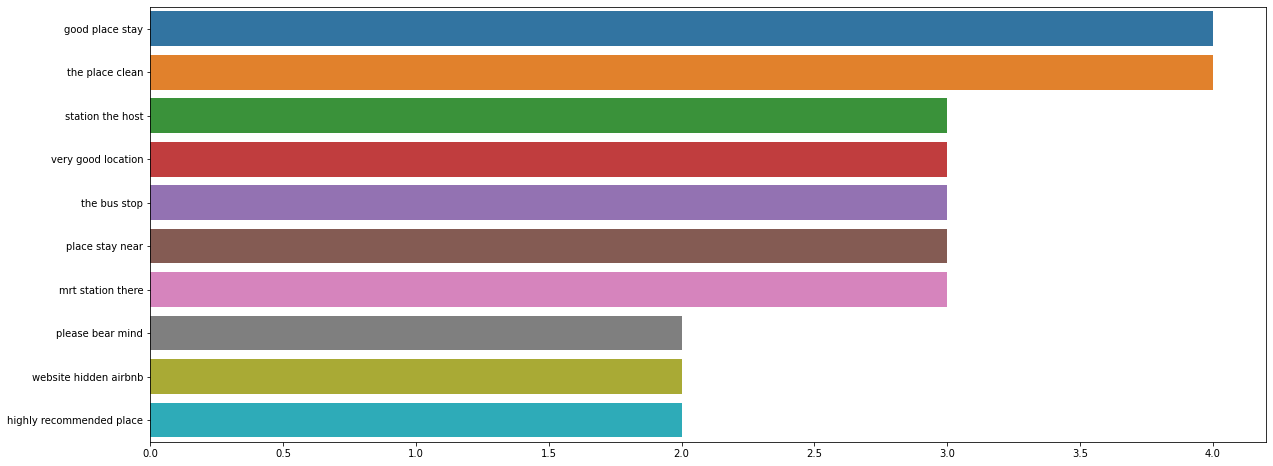

In [30]:
P_threegrams=get_top_ngram(under_dataframe_P['comments_nostop'],n=3)
x,y=map(list,zip(*P_threegrams))
sns.barplot(x=y,y=x)

<AxesSubplot:>

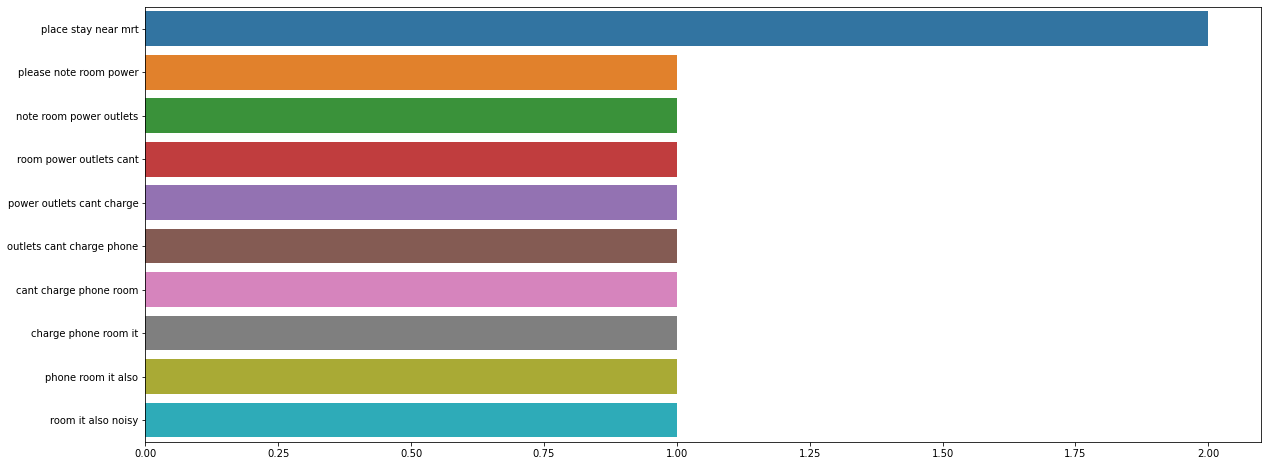

In [31]:
P_fourgrams=get_top_ngram(under_dataframe_P['comments_nostop'],n=4)
x,y=map(list,zip(*P_fourgrams))
sns.barplot(x=y,y=x)

## Qpositive

In [32]:
under_dataframe_QP_count = pd.Series(' '.join(under_dataframe_QP['comments'] ).split()).value_counts()
under_dataframe_QP_count.head

<bound method NDFrame.head of THE         181
AND         146
TO          131
IS          121
PLACE        93
           ... 
WATER         1
TV            1
CHANNELS      1
THAT,         1
TRIPS         1
Length: 997, dtype: int64>

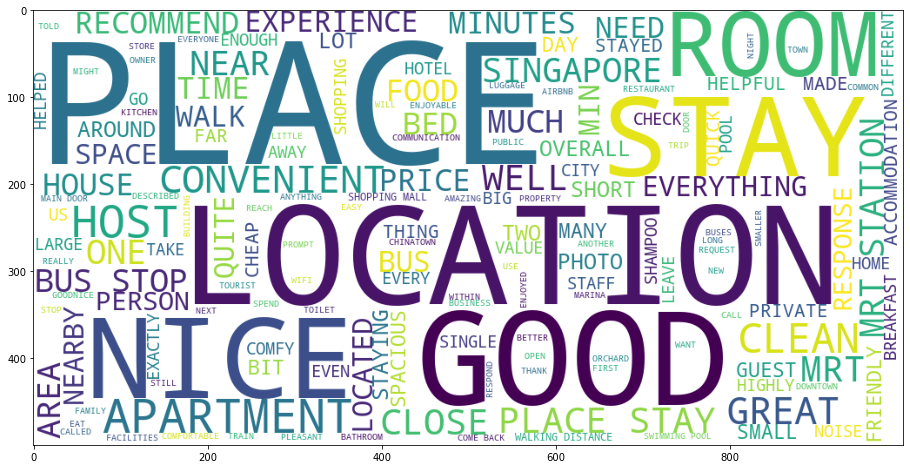

In [33]:
#word cloud
corpus = under_dataframe_QP['comments_nostop']
plt.rcParams['figure.figsize'] = 20,8
word_cloud = ""
for row in corpus:
    for word in row:
        word_cloud+=" ".join(word)
wordcloud5 = WordCloud(width = 1000, height = 500,background_color ='white',min_font_size = 10).generate(word_cloud)

#word cloud
plt.imshow(wordcloud5)

<AxesSubplot:>

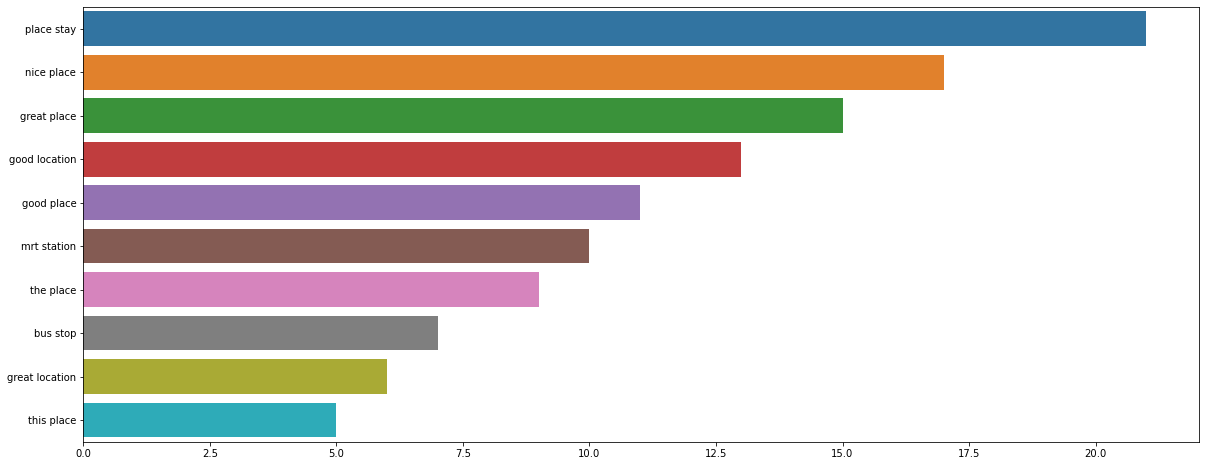

In [34]:
QP_twograms=get_top_ngram(under_dataframe_QP['comments_nostop'],n=2)
x,y=map(list,zip(*QP_twograms))
sns.barplot(x=y,y=x)

<AxesSubplot:>

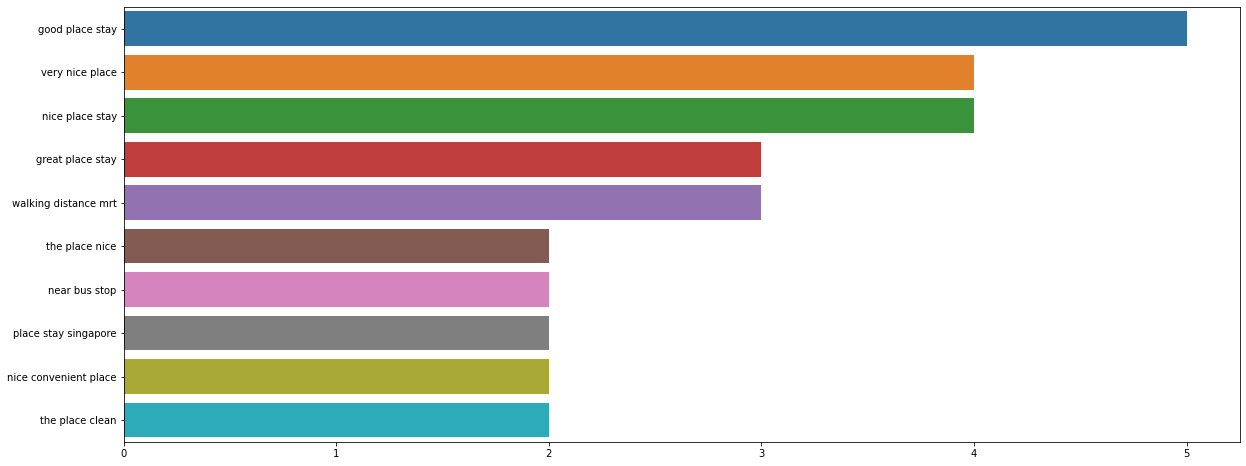

In [35]:
QP_threegrams=get_top_ngram(under_dataframe_QP['comments_nostop'],n=3)
x,y=map(list,zip(*QP_threegrams))
sns.barplot(x=y,y=x)

<AxesSubplot:>

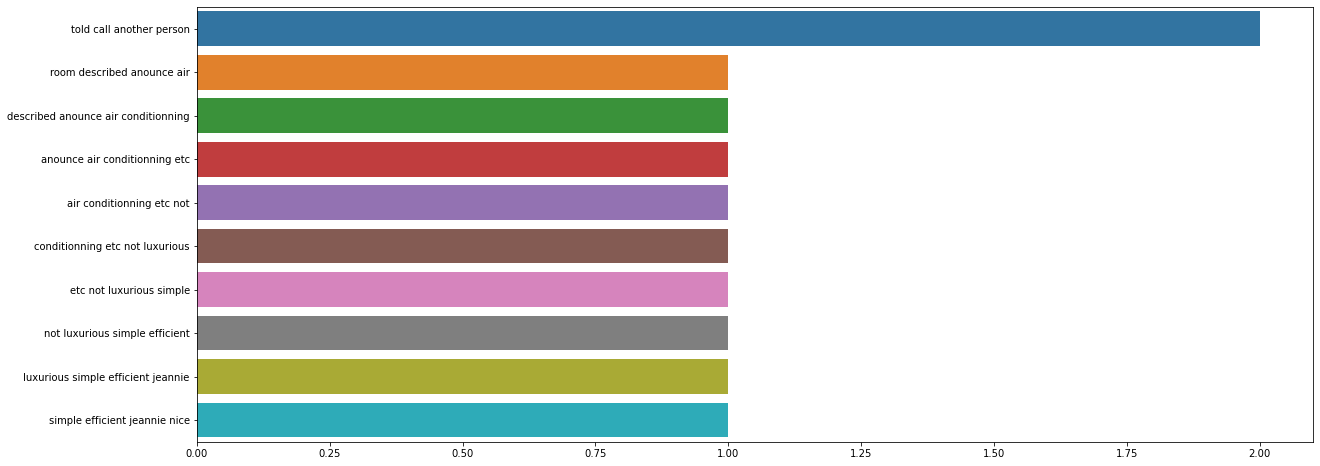

In [36]:
QP_fourgrams=get_top_ngram(under_dataframe_QP['comments_nostop'],n=4)
x,y=map(list,zip(*QP_fourgrams))
sns.barplot(x=y,y=x)

## Vpositive

In [37]:
under_dataframe_VP_count = pd.Series(' '.join(under_dataframe_VP['comments'] ).split()).value_counts()
under_dataframe_VP_count.head

<bound method NDFrame.head of THE           497
AND           473
TO            307
A             292
IS            256
             ... 
LINA            1
MRTS            1
FINEST          1
CANTONMENT      1
AREAS           1
Length: 1816, dtype: int64>

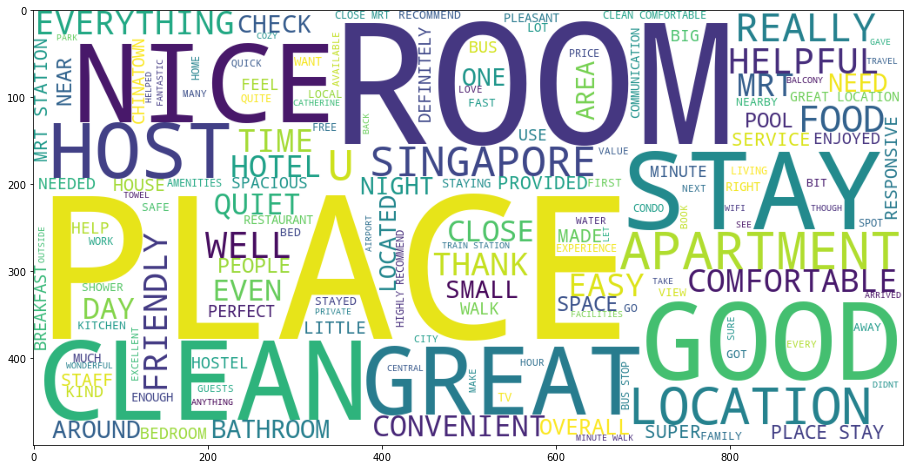

In [38]:
#word cloud
corpus = under_dataframe_VP['comments_nostop']
plt.rcParams['figure.figsize'] = 20,8
word_cloud = ""
for row in corpus:
    for word in row:
        word_cloud+=" ".join(word)
wordcloud6 = WordCloud(width = 1000, height = 500,background_color ='white',min_font_size = 10).generate(word_cloud)

#word cloud
plt.imshow(wordcloud6)

<AxesSubplot:>

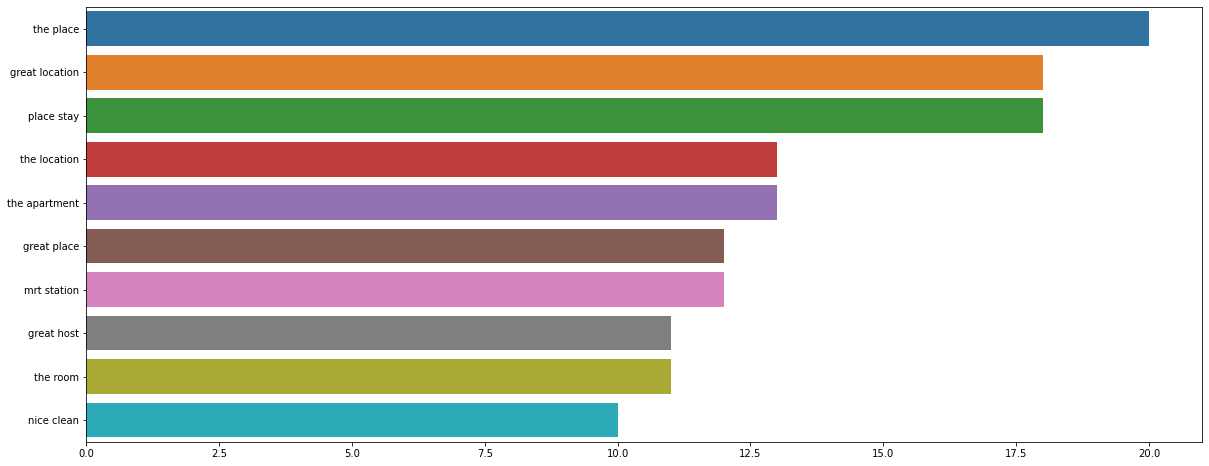

In [39]:
VP_twograms=get_top_ngram(under_dataframe_VP['comments_nostop'],n=2)
x,y=map(list,zip(*VP_twograms))
sns.barplot(x=y,y=x)

<AxesSubplot:>

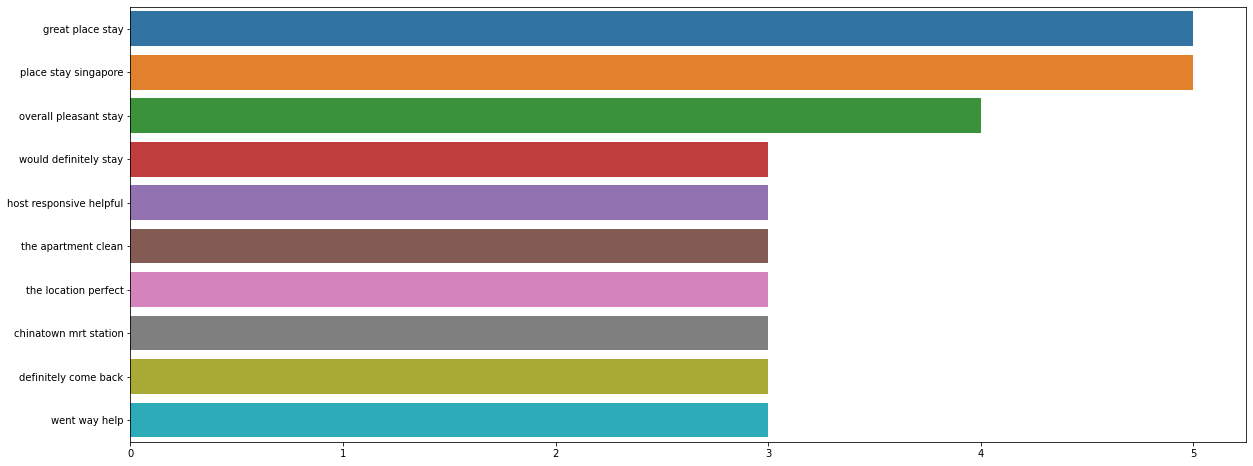

In [40]:
VP_threegrams=get_top_ngram(under_dataframe_VP['comments_nostop'],n=3)
x,y=map(list,zip(*VP_threegrams))
sns.barplot(x=y,y=x)

<AxesSubplot:>

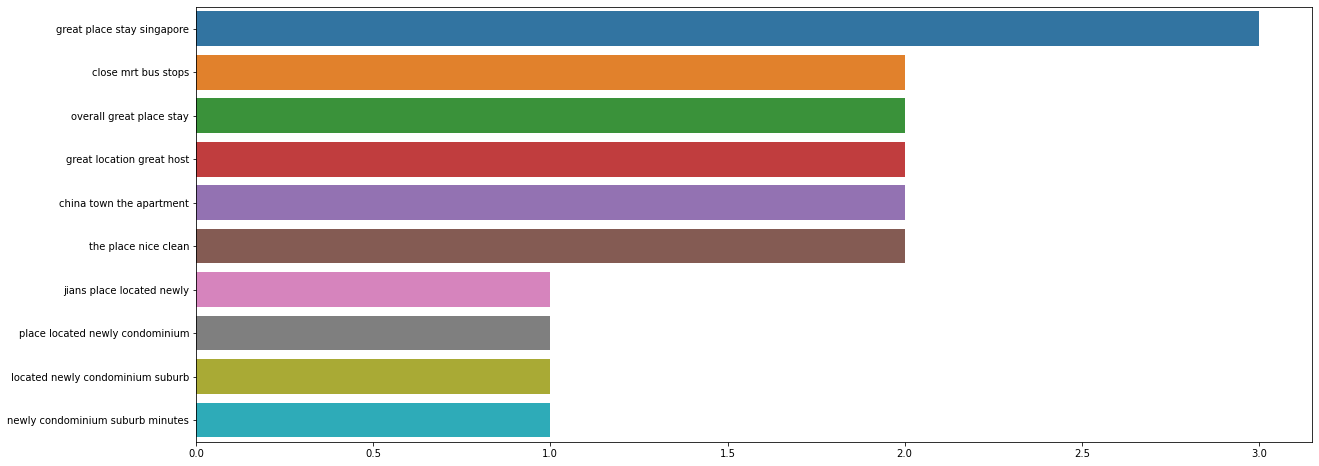

In [41]:
VP_fourgrams=get_top_ngram(under_dataframe_VP['comments_nostop'],n=4)
x,y=map(list,zip(*VP_fourgrams))
sns.barplot(x=y,y=x)